# Calculate the Image Structure Function of the simulated video

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ddm_toolkit
from ddm_toolkit.workflows import simul2_load_simulation_result_file
from ddm_toolkit.workflows import simul3_calculate_ISF

Running inside a Notebook (Jupyter or otherwise)...


In [3]:
from ddm_toolkit.notebook_utils import notebook_video_jshtml
from IPython.display import HTML

In [4]:
# set input filename (simulation result)
# set outpuf filename (ISF)
infpn = 'datafiles/simulNB_simulation_result.npz'
outfpn = 'datafiles/simulNB_ISF.npz'

In [5]:
ims, params = simul2_load_simulation_result_file(infpn)

Loading file: datafiles/simulNB_simulation_result.npz


In [6]:
params.ISE_type = 0 # we need to set these parameters, since they were not set before
params.ISE_Npx = ims.shape[1] # use image width to set ISE width
params.ISE_Nbuf = 50

In [7]:
ISF = simul3_calculate_ISF(ims, params)

*** using ImageStructureEngine (the original) ***


  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
ISF.save(outfpn)

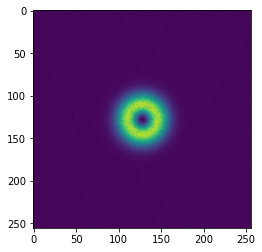

In [9]:
plt.imshow(ISF.ISF[1])

In [10]:
%%capture --no-stderr --no-stdout
jshtml_animation = notebook_video_jshtml(ISF.ISF, Nframes = params.ISE_Nbuf,
                                        vmin = 0, vmax = ISF.ISF[1:].max()/2.0)

Time needed for generating 50 frame JS animation: 2.22s


In [11]:
HTML(jshtml_animation)